In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import sigmoid
from keras.losses import mse
from keras.optimizers import SGD, Adam
from keras.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, cosine_proximity, accuracy

from sklearn.datasets import make_circles

import matplotlib.pyplot as plt

Using TensorFlow backend.


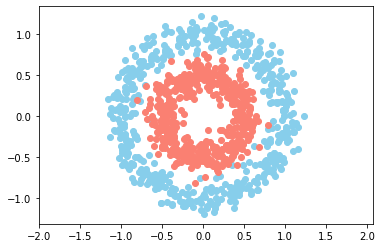

In [2]:
n = 1000

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.1)

plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

In [3]:
model = Sequential()

model.add(Dense(4, input_dim=2, activation=sigmoid)) # primera capa oculta 4 neuronas y fa sigmoid
model.add(Dense(8, activation=sigmoid)) # primera capa oculta 8 neuronas y fa sigmoid
model.add(Dense(4, activation=sigmoid)) # primera capa oculta 4 neuronas y fa sigmoid
model.add(Dense(1, activation=sigmoid)) # primera capa oculta 1 neuronas y fa sigmoid


In [4]:

sgd = SGD(learning_rate=0.01)

#adam = Adam(learning_rate=0.006)

model.compile(loss=mse, optimizer=sgd, metrics=[accuracy, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, cosine_proximity])
#model.compile(loss=mse, optimizer=sgd)

In [5]:
history = model.fit(X, Y, batch_size=100, epochs=200, verbose=False)

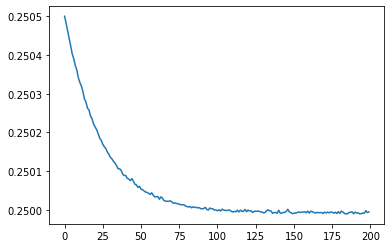

In [6]:
history.history
plt.plot(range(len(history.history['loss'])), history.history['loss'])
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['mean_absolute_error'])
#plt.plot(history.history['mean_absolute_percentage_error'])
#plt.plot(history.history['cosine_proximity'])
plt.show()
